In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

np.random.seed(625)

In [2]:
def gen_bern(s):
    p = 1 / (np.exp(-s + 3) + 1)
    return np.random.binomial(n=1, p=p)

In [3]:
# Number of sample size applicants get 
n = 35000

geometric distribution models the number of trials that must be run in order to achieve success
f(k) = p * (1-p)^(k-1), p is the probability of sucess in an individual trial.

pareto wealth distribution (fat tail)

standard_cauchy

In [4]:
lst = [np.random.geometric(p=1/500, size=(n, 1)), 
       np.round(np.random.pareto(a=3, size=(n, 1))), 
       np.round(np.abs(5 * np.random.standard_cauchy(size=(n, 1)))), 
       np.random.binomial(n=1, p=1/43, size=(n, 5)), 
       np.random.binomial(n=1, p=1/33, size=(n, 5)), 
       np.random.binomial(n=1, p=1/7, size=(n, 5)), 
       np.random.choice([-1, 0, 999], p=[0.03, 0.95, 0.02], size=(n, 1))]

arr = np.concatenate(lst, axis=1)

In [5]:
np.shape(arr)

(35000, 19)

In [6]:
df = pd.DataFrame(arr, 
                  columns=["x" + str(i) for i in range(arr.shape[1])])

df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,153.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,234.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,27.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,198.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,201.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df["x19"] = np.round(np.clip(df["x0"] + (df["x0"] / 5) * np.random.randn(df.shape[0]), 
                             a_min=0, a_max=None))

In [8]:
df["x20"] = np.round(np.clip(df["x1"] + (df["x1"] * 5) * np.random.randn(df.shape[0]), 
                             a_min=0, a_max=None))

In [9]:
df["x21"] = np.round(np.clip(np.sqrt(df["x0"]) + df["x0"] / 8 * np.random.randn(df.shape[0]), 
                             a_min=0, a_max=None))

In [10]:
df["x22"] = np.round(np.clip(np.sqrt(1 / (df["x0"]) + 1) + np.random.randn(df.shape[0]),
                             a_min=0, a_max=None))

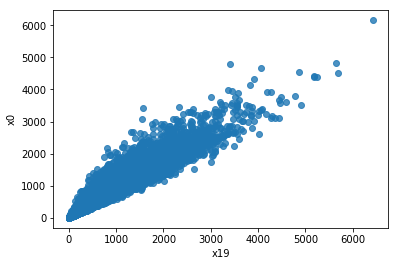

In [11]:
sns.regplot(df["x19"], df["x0"], fit_reg=False)

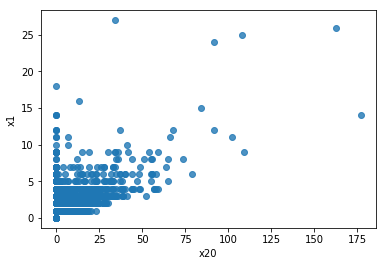

In [12]:
sns.regplot(df["x20"], df["x1"], fit_reg=False)

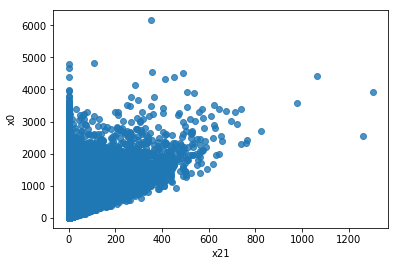

In [13]:
sns.regplot(df["x21"], df["x0"], fit_reg=False)

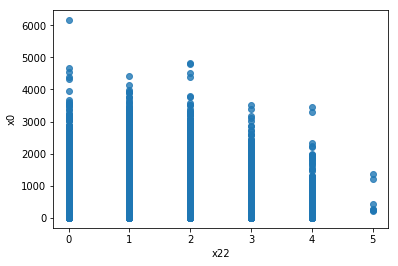

In [14]:
sns.regplot(df["x22"], df["x0"], fit_reg=False)

In [15]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,153.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,179.0,4.0,14.0,0.0
1,234.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,221.0,0.0,60.0,4.0
2,27.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,34.0,0.0,3.0,1.0
3,198.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,209.0,0.0,0.0,1.0
4,201.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,246.0,0.0,48.0,1.0


In [16]:
beta = np.random.laplace(scale=0.15, size=df.shape[1])
beta[np.random.choice([i for i in range(len(beta))], size=10, replace=False)] = 0
beta[21] = 0
beta

array([ 0.        , -0.04676622,  0.06832606,  0.        ,  0.19047654,
        0.        ,  0.        , -0.32241126,  0.07869976,  0.        ,
       -0.48949871,  0.        ,  0.        , -0.07883538,  0.        ,
       -0.24664751,  0.05152042,  0.        ,  0.00766132,  0.        ,
        0.27655213,  0.        , -0.22199162])

In [17]:
scale = StandardScaler()
arr = scale.fit_transform(df)

df["y"] = np.apply_along_axis(func1d=gen_bern, axis=0, arr=np.dot(arr, beta))
y = df.pop("y")
np.mean(y)

0.055857142857142855

In [18]:
pd.DataFrame({"variable": df.columns, 
             "importance": np.abs(beta)}).sort_values(by="importance", ascending=False).head(20)

,importance,variable
10,0.489499,x10
7,0.322411,x7
20,0.276552,x20
15,0.246648,x15
22,0.221992,x22
4,0.190477,x4
13,0.078835,x13
8,0.078700,x8
2,0.068326,x2
16,0.051520,x16


In [19]:
s = np.dot(arr, beta)
roc_auc_score(y, s)

0.6497823745733071

In [20]:
m = 500
indx = np.random.choice(df.index, size=m)
df.loc[indx, "x19"] = df.loc[indx, "x19"] + df.loc[indx, "x19"] + np.random.pareto(a=0.2, size=m)

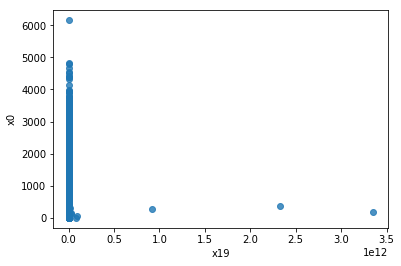

In [21]:
sns.regplot(df["x19"], df["x0"], fit_reg=False)

In [22]:
df.loc[np.random.random(df.shape[0]) < 0.01, "x12"] = np.nan
df.loc[np.random.random(df.shape[0]) < 0.02, "x14"] = np.nan
df.loc[np.random.random(df.shape[0]) < 0.05, "x16"] = np.nan
df.loc[np.random.random(df.shape[0]) < 0.05, "x20"] = np.nan

In [23]:
df.join(y).to_csv("your_csv.csv", index=False, header=True)